<a href="https://colab.research.google.com/github/talhaanwarch/DeftEval2020/blob/master/Epilepsy_feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#https://zenodo.org/record/1252141

In [1]:
!pip install git+https://github.com/forrestbao/pyeeg.git
!pip install git+https://github.com/talhaanwarch/entropy.git


  Cloning https://github.com/forrestbao/pyeeg.git to /tmp/pip-req-build-9f1ueojt
  Running command git clone -q https://github.com/forrestbao/pyeeg.git /tmp/pip-req-build-9f1ueojt
  Created wheel for pyeeg: filename=pyeeg-0.4.4-py2.py3-none-any.whl size=28121 sha256=9707194afafb065fcde8059d337d03527f3a730a4ccaaed583e7246cbde81251
  Stored in directory: /tmp/pip-ephem-wheel-cache-jhvgrexn/wheels/2d/3f/ad/106d4fc80b61d1ea1fc18e76e7439fd98aa043d83d58eae741
Successfully built pyeeg
  Cloning https://github.com/talhaanwarch/entropy.git to /tmp/pip-req-build-bntqcccz
  Running command git clone -q https://github.com/talhaanwarch/entropy.git /tmp/pip-req-build-bntqcccz
  Created wheel for entropy: filename=entropy-0.1.1-cp36-none-any.whl size=15447 sha256=6603a023f3d336d242cd18db5ed8d8e3cc40306ef61396d5046974375f41fd5b
  Stored in directory: /tmp/pip-ephem-wheel-cache-3_fi55gk/wheels/79/43/63/3fa9c8c5f03fe3a78d71c1aeedca9577f2f32fb2156ff9ecf8
Successfully built entropy


In [2]:
!wget https://zenodo.org/record/1252141/files/EEGs_Guinea-Bissau.zip

--2019-12-11 15:13:38--  https://zenodo.org/record/1252141/files/EEGs_Guinea-Bissau.zip
Resolving zenodo.org (zenodo.org)... 188.184.95.95
Connecting to zenodo.org (zenodo.org)|188.184.95.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 153973086 (147M) [application/octet-stream]
Saving to: ‘EEGs_Guinea-Bissau.zip’

EEGs_Guinea-Bissau. 100%[===================>] 146.84M  9.72MB/s    in 17s     

2019-12-11 15:13:57 (8.57 MB/s) - ‘EEGs_Guinea-Bissau.zip’ saved [153973086/153973086]



In [0]:
from zipfile import ZipFile 
data = ZipFile('EEGs_Guinea-Bissau.zip')
data.extractall()

In [0]:
import pandas as pd

In [0]:
meta=pd.read_csv('https://zenodo.org/record/1252141/files/metadata_guineabissau.csv')

In [6]:
meta.head()

,subject.id,Group,Eyes.condition,Remarks,recordedPeriod,startTime
0,1,Epilepsy,closed-3min-then-open-2min,by 45s reposition electrodes,301,27/5/2020 14:33
1,2,Control,open-3min-then-closed-2min,NaN,309,26/5/2020 22:44
2,3,Epilepsy,closed-3min-then-open-2min,NaN,309,27/5/2020 14:26
3,4,Epilepsy,closed-3min-then-open-2min,"Green lights not shown, but good EEG traces",299,27/5/2020 15:23
4,5,Control,closed-3min-then-open-2min,NaN,302,23/5/2020 19:09


In [0]:
EP_sub=meta['subject.id'][meta['Group']=='Epilepsy']
CT_sub=meta['subject.id'][meta['Group']=='Control']

In [0]:
Epilepsy=[]
for i in EP_sub:
  Epilepsy.append(pd.read_csv('EEGs_Guinea-Bissau/signal-{}.csv.gz'.format(i), compression='gzip')) 

In [0]:
Control=[]
for i in CT_sub:
  Control.append(pd.read_csv('EEGs_Guinea-Bissau/signal-{}.csv.gz'.format(i), compression='gzip')) 

In [10]:
Epilepsy[0].head()

,Unnamed: 0,AF3,AF4,F3,F4,F7,F8,FC5,FC6,O1,O2,P7,P8,T7,T8,COUNTER,INTERPOLATED,GYROX,GYROY,RAW_CQ,CQ_CMS,CQ_F7,CQ_T7,CQ_O2,CQ_FC6,CQ_AF4,CQ_F3,CQ_P7,CQ_P8,CQ_F4,CQ_AF3,CQ_FC5,CQ_O1,CQ_T8,CQ_F8,CQ_DRL
0,1,4426.153846,3994.871795,4408.205128,3847.692308,4690.256410,3895.897436,4702.051282,3914.871795,4049.743590,4297.948718,4186.153846,4132.820513,4106.666667,4076.410256,28,0,1555,1751,0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
1,2,4420.512821,3986.666667,4394.358974,3836.923077,4678.461538,3886.666667,4696.410256,3910.769231,4054.358974,4295.897436,4187.179487,4126.666667,4105.641026,4065.128205,29,0,1555,1755,0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
2,3,4413.846154,3986.153846,4386.666667,3831.794872,4654.871795,3881.025641,4690.769231,3908.205128,4066.666667,4301.025641,4188.205128,4123.076923,4103.076923,4063.589744,30,0,1555,1755,0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
3,4,4407.692308,3984.615385,4384.102564,3832.820513,4644.615385,3883.076923,4686.153846,3910.256410,4063.076923,4298.974359,4184.615385,4127.179487,4095.384615,4071.282051,31,0,1559,1751,0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
4,5,4407.179487,3978.974359,4382.564103,3832.307692,4647.692308,3878.974359,4685.641026,3903.076923,4057.948718,4295.384615,4182.564103,4128.205128,4090.769231,4064.102564,32,0,1559,1759,0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


In [0]:
from scipy import signal
nyq = 0.5 * 128
l=0.3
low = l / nyq
high = 45 / nyq
b, a = signal.butter(4, [low,high], 'band')

In [0]:
EP_data=[]
for EP in Epilepsy:
  data=EP.iloc[:,1:15].values
  EP_data.append(signal.filtfilt(b, a, data.T).T)


In [0]:
CT_data=[]
for CT in Control:
  data=CT.iloc[:,1:15].values
  CT_data.append(signal.filtfilt(b, a, data.T).T)


In [0]:
def reshape(data):   
    shape=data.ravel().shape[0]
    s=shape%(14*1000)
    if s!=0:
        d=data.ravel()[s//2:-s//2].reshape(-1,1000,14)
        #return np.swapaxes(d,1,2)   
        return d
    else: 
        d1=data.reshape(-1,1000,14)
        #return np.swapaxes(d1,1,2)   
        return d1

In [0]:

EP_reshaped=[]
for i in EP_data:
    EP_reshaped.append(reshape(i))
    
    
CT_reshaped=[]
for i in CT_data:
    CT_reshaped.append(reshape(i))

In [16]:
EP_reshaped[0].shape

(38, 1000, 14)

In [0]:
from scipy import stats
import pyeeg
from entropy import *
def mean(data):
    return np.mean(data,axis=0)
    
def std(data):
    return np.std(data,axis=0)

def ptp(data):
    return np.ptp(data,axis=0)

def var(data):
        return np.var(data,axis=0)

def minim(data):
      return np.min(data,axis=0)


def maxim(data):
      return np.max(data,axis=0)


def mean_square(data):
      return np.mean(data**2,axis=0)

def rms(data): #root mean square
      return  np.sqrt(np.mean(data**2,axis=0))  

def abs_diffs_signal(data):
    return np.sum(np.abs(np.diff(data,axis=0)),axis=0)


def skewness(data):
    return stats.skew(data,axis=0)

def kurtosis(data):
    return stats.kurtosis(data,axis=0)

def zero_crossing(data):
    return np.argmax(np.diff(np.sign(data),axis=0),axis=0)

def app_epy(data):
    result=[]
    for i in data.T:
        result.append(app_entropy(i, order=2, metric='chebyshev'))
    return np.array(result)

def perm_epy(data):
    result=[]
    for i in data.T:
        result.append(perm_entropy(i, order=3, normalize=True))
    return np.array(result)

def svd_epy(data):
    result=[]
    for i in data.T:
        result.append(svd_entropy(i, order=3, delay=1, normalize=True))
    return np.array(result)

def spectral_epy(data):
    result=[]
    for i in data.T:
        result.append(spectral_entropy(i, 100, method='welch', normalize=True))
    return np.array(result)

def sample_epy(data):
    result=[]
    for i in data.T:
        result.append(sample_entropy(i, order=2, metric='chebyshev'))
    return np.array(result)


def katz(data):
    result=[]
    for i in data.T:
        result.append(katz_fd(i))
    return np.array(result)

def higuchi(data):
    result=[]
    for i in data.T:
        result.append(higuchi_fd(i))
    return np.array(result)


def petrosian(data):
    result=[]
    for i in data.T:
        result.append(petrosian_fd(i))
    return np.array(result)

def autogressiveModelParameters(data):
    feature = []
    for i in data.T:
        coeff, sig = alg.AR_est_YW(i, order=5)
        feature.append(np.mean(coeff))
    return np.array(feature)

def teager(x):
    for i in range(len(x)-1):
        return x[i]**2 - (x[i-1]*x[i+1])


        
def hjorth_mobility(data):
    return np.divide(np.std(np.diff(data,axis=0),axis=0),np.std(data,axis=0))

def hjorth_complexity(data):
    return np.divide(hjorth_mobility(np.diff(data,axis=0)),  hjorth_mobility(data))      




def concatenate_features(data):
    return np.concatenate((mean(data),std(data),ptp(data),var(data),minim(data),maxim(data),
                          mean_square(data),rms(data),abs_diffs_signal(data),
                          skewness(data),kurtosis(data),zero_crossing(data),
                          app_epy(data),perm_epy(data),svd_epy(data),spectral_epy(data),sample_epy(data),
                          katz(data),higuchi(data),petrosian(data),
                          hjorth_mobility(data),hjorth_complexity(data)),axis=0)

In [0]:
features1=[]
for f in CT_reshaped:
    feature=[]
    for i in f:
        feature.append(concatenate_features(i))
    features1.append(np.mean(np.array(feature),axis=0))
    

In [0]:

features2=[]
for f in EP_reshaped:
    feature=[]
    for i in f:
        feature.append(concatenate_features(i))
    features2.append(np.mean(np.array(feature),axis=0))

In [0]:
x1=np.array(features1)        
x2=np.array(features2)      

X=np.concatenate((x1,x2),axis=0)
y=np.concatenate(((np.zeros(x1.shape[0])),(np.ones(x2.shape[0]))))


In [72]:
X.shape,y.shape

((97, 308), (97,))

#import libraries

In [0]:
from scipy import stats
import pyeeg
from entropy import *
import pywt
#from nitime import algorithms as alg
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MaxAbsScaler
from sklearn.preprocessing import StandardScaler,MaxAbsScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#import nolds
np.warnings.filterwarnings('ignore')

# Classification

In [0]:
#%% split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all,test_size=0.3, random_state=42,stratify=y_all)

In [0]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [39]:

clf=SVC(kernel='rbf')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,y_pred))
print('accuracy is ',accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74        14
         1.0       0.76      0.81      0.79        16

    accuracy                           0.77        30
   macro avg       0.77      0.76      0.76        30
weighted avg       0.77      0.77      0.77        30

accuracy is  0.7666666666666667


#Feature Selection

In [0]:
feature_list=['mean','std','ptp','var','minim','maxim','mean_square','rms','abs_diffs_signal','skewness','kurtosis','zero_crossing',
'app_epy','perm_epy','svd_epy','spectral_epy','sample_epy','katz','higuchi','petrosian','hjorth_mobility','hjorth_complexity']

In [0]:

classifiers = [
    KNeighborsClassifier(),
    SVC(kernel="linear"),
    DecisionTreeClassifier(),
    LogisticRegression()]

In [0]:
X_all=X.copy()
y_all=y.copy()
clf_feature_selected=[]
for clf in classifiers:
    feature_selected=[]
    for i in range(50):
        randomize = np.arange(len(X_all))
        np.random.shuffle(randomize)
        X_all = X_all[randomize]
        y_all = y_all[randomize]
        for i,j in zip(range(0,X_all.shape[1],14),feature_list):
            X_new=X_all[:,i:i+14]
            y_new=y_all.copy()
            X_train, X_test, y_train, y_test = train_test_split(X_new, y_all,test_size=0.2, random_state=42,stratify=y_all)
            sc=StandardScaler()
            X_train=sc.fit_transform(X_train)
            X_test=sc.transform(X_test)

            clf.fit(X_train,y_train)
            y_pred = clf.predict(X_test)  
            acc=metrics.accuracy_score(y_test, y_pred)
      #print("Accuracy of ",j,metrics.accuracy_score(y_test, y_pred))
            if acc>0.75:
                feature_selected.append(j)
    clf_feature_selected.append(feature_selected)        
 # print('-------------------------------------------------------------------')

In [75]:

clf_list=['KNN','SVM','DT','LR']
from collections import Counter
clf_count=[]
for i,j in zip(range(4),clf_list):
    feature_selected=clf_feature_selected[i]
    count= {x:feature_selected.count(x) for x in feature_selected}
    c = Counter(count)
    #print(c.most_common())
    #clf_count.append(c.most_common(10))
    print('==================================================================================================')
    print(j,c.most_common(10))

KNN [('higuchi', 30), ('petrosian', 17), ('perm_epy', 15), ('hjorth_mobility', 13), ('app_epy', 13), ('katz', 11), ('svd_epy', 11), ('sample_epy', 10), ('skewness', 5), ('abs_diffs_signal', 5)]
SVM [('sample_epy', 35), ('katz', 35), ('svd_epy', 33), ('hjorth_mobility', 33), ('app_epy', 31), ('higuchi', 27), ('spectral_epy', 23), ('abs_diffs_signal', 21), ('hjorth_complexity', 17), ('petrosian', 9)]
DT [('higuchi', 8), ('skewness', 8), ('abs_diffs_signal', 6), ('hjorth_mobility', 5), ('mean_square', 4), ('hjorth_complexity', 4), ('svd_epy', 4), ('perm_epy', 4), ('var', 3), ('spectral_epy', 3)]
LR [('higuchi', 31), ('katz', 29), ('app_epy', 28), ('sample_epy', 28), ('svd_epy', 27), ('hjorth_mobility', 27), ('spectral_epy', 23), ('hjorth_complexity', 23), ('abs_diffs_signal', 20), ('petrosian', 13)]


In [0]:

from collections import Counter
clf_feature=[]
for i in range(4):
    feature_selected=clf_feature_selected[i]
    count= {x:feature_selected.count(x) for x in feature_selected}
    c = Counter(count)
    c={k: v / total for total in (sum(c.values(), 0.0),) for k, v in c.items()}

    for k,v in c.items():
        if v>.1:
            clf_feature.append(k)

In [77]:

count= {x:clf_feature.count(x) for x in clf_feature}
c = Counter(count)
print(c.most_common())
good_feature=[]
for i in range(len(c.keys())):
      good_feature.append(c.most_common()[i][0])
print('===============================================================================================================')
print(good_feature)

[('higuchi', 3), ('app_epy', 2), ('sample_epy', 2), ('katz', 2), ('perm_epy', 1), ('petrosian', 1), ('svd_epy', 1), ('hjorth_mobility', 1), ('abs_diffs_signal', 1), ('skewness', 1)]
['higuchi', 'app_epy', 'sample_epy', 'katz', 'perm_epy', 'petrosian', 'svd_epy', 'hjorth_mobility', 'abs_diffs_signal', 'skewness']


In [79]:

X_good=[]
for key,val in zip(feature_list,range(0,X.shape[1],16)):
    for fe in good_feature:
        if key==fe:     
            print('key',key,'value',val,":",val+16) 
            X_good.append(X[:,val:val+16])

key abs_diffs_signal value 128 : 144
key skewness value 144 : 160
key app_epy value 192 : 208
key perm_epy value 208 : 224
key svd_epy value 224 : 240
key sample_epy value 256 : 272
key katz value 272 : 288
key higuchi value 288 : 304
key petrosian value 304 : 320


In [0]:

X=np.concatenate((X_good),axis=1)


# Tuning

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

clf = SVC(kernel="rbf")
Cs = [ 1,2,3,5,7,10,15,30,50,70,100]
gammas = [0.001,0.01,0.02,0.03,0.04,0.05,0.1,0.3,0.5,0.8,1]
pipe = Pipeline(steps=[('scaler', sc), ('classifier', clf)])
estimator = GridSearchCV(pipe,
                         dict(classifier__C=Cs,classifier__gamma=gammas),cv=5,n_jobs=-1,iid=False) 

results = estimator.fit(X,y)
print(results.best_score_ )
results.best_params_

0.8135338345864662


{'classifier__C': 3, 'classifier__gamma': 0.001}

### NuSVM

In [82]:
from sklearn.svm import SVC, LinearSVC, NuSVC

clf = NuSVC(kernel="rbf")
nu = [0.1,0.3,0.5,0.7]
gammas = [0.001,0.01,0.02,0.03,0.04,0.05,0.1,0.3,0.5,0.8,1]
pipe = Pipeline(steps=[('scaler', sc), ('classifier', clf)])
estimator = GridSearchCV(pipe,
                         dict(classifier__nu=nu,classifier__gamma=gammas),cv=5,n_jobs=-1,iid=False) 

results = estimator.fit(X,y)
print(results.best_score_ )
results.best_params_

0.8155388471177945


{'classifier__gamma': 0.01, 'classifier__nu': 0.7}

### LR

In [83]:
clf = LogisticRegression()
C = [ 1,2,3,5,7,10,15,30,50,70,100]
penalty=["l1","l2"]
pipe = Pipeline(steps=[('scaler', sc), ('classifier', clf)])
estimator = GridSearchCV(pipe,
                         dict(classifier__C=C,classifier__penalty=penalty),cv=5,n_jobs=-1,iid=False) 

results = estimator.fit(X,y)
print(results.best_score_ )
results.best_params_

0.8145363408521302


{'classifier__C': 1, 'classifier__penalty': 'l2'}

### KNN

In [84]:

clf = KNeighborsClassifier()

n_neighbors  = [ 3,4,5,6,7,8,9,11,13]
weights  = ['uniform','distance']
metric=['minkowski','manhattan','euclidean']
pipe = Pipeline(steps=[('scaler', sc), ('classifier', clf)])
estimator = GridSearchCV(pipe,
                         dict(classifier__n_neighbors=n_neighbors,classifier__weights=weights,classifier__metric=metric),cv=5,n_jobs=-1,iid=False) 
results = estimator.fit(X,y)
print(results.best_score_ )
results.best_params_

0.775438596491228


{'classifier__metric': 'manhattan',
 'classifier__n_neighbors': 8,
 'classifier__weights': 'distance'}

# Cross Validation

In [0]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [0]:
classifiers = [
    KNeighborsClassifier(n_neighbors=8,weights='distance',metric='manhattan'),
    SVC(kernel="rbf",C=3,gamma=0.001),
    NuSVC(nu=0.7,gamma=0.001),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression(C=1,penalty='l2')]

In [0]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('transformer', sc),('estimator', clf)])


In [87]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

accuracy=[]
accuracy_std=[]
f1_scores=[]
f1_scores_std=[]
for clfs in classifiers:
    pipeline.set_params(estimator = clfs)
    name = clfs.__class__.__name__
    
    print("="*30)
    print(name)       
    print('****Results****')
    scores = cross_val_score(pipeline, X, y, cv=5)
    #f1_score = cross_val_score(clf, X_rfe, y, cv=5,scoring='f1')
    print("Accuracy: {:.4%}".format(np.array(scores).mean()))
    accuracy.append(np.array(scores).mean())
    accuracy_std.append(np.array(scores).std())
    #f1_scores.append(np.array(f1_score).mean())
    #f1_scores_std.append(np.array(f1_score).std())


KNeighborsClassifier
****Results****
Accuracy: 77.5439%
SVC
****Results****
Accuracy: 81.3534%
NuSVC
****Results****
Accuracy: 79.3484%
DecisionTreeClassifier
****Results****
Accuracy: 69.1228%
RandomForestClassifier
****Results****
Accuracy: 71.8797%
AdaBoostClassifier
****Results****
Accuracy: 74.0852%
GradientBoostingClassifier
****Results****
Accuracy: 70.9273%
GaussianNB
****Results****
Accuracy: 65.8647%
LinearDiscriminantAnalysis
****Results****
Accuracy: 70.1754%
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 47.6190%
LogisticRegression
****Results****
Accuracy: 81.4536%


Text(0.5, 1.0, 'Classifiers')

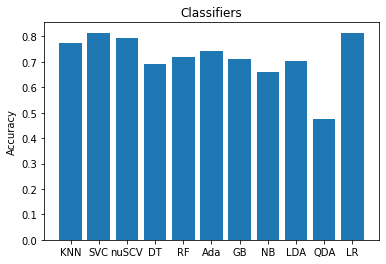

In [88]:
import matplotlib.pyplot as plt
classifier=['KNN','SVC','nuSCV','DT','RF','Ada','GB','NB','LDA','QDA','LR']
y_pos = np.arange(len(classifier))
plt.bar(y_pos,np.array(accuracy))
plt.xticks(y_pos, classifier)
plt.ylabel('Accuracy')
plt.title('Classifiers')

# Principle Component Analysis

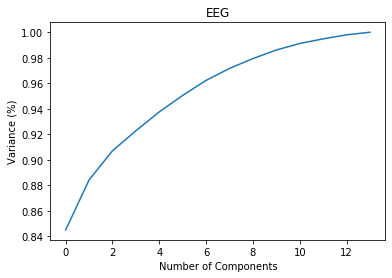

In [89]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import cross_val_score

#Fitting the PCA algorithm with our Data
pca = PCA().fit(X_train)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('EEG')
plt.show()

In [0]:
clf = SVC(kernel='rbf')
pca = PCA(n_components=20)

#pipeline = Pipeline([('selector',pca), ('estimator', clf)])
pipeline = Pipeline([('transformer', sc),('selector',pca), ('estimator', clf)])


In [91]:

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

accuracy_pca=[]
std_pca=[]
f1_scores=[]
f1_scores_std=[]
for clfs in classifiers:
    pipeline.set_params(estimator = clfs)
    name = clfs.__class__.__name__
    
    print("="*30)
    print(name)       
    print('****Results****')
    scores = cross_val_score(pipeline, X, y, cv=5)
    #f1_score = cross_val_score(clf, X_rfe, y, cv=5,scoring='f1')
    print("Accuracy: {:.4%}".format(np.array(scores).mean()))
    accuracy_pca.append(np.array(scores).mean())
    std_pca.append(np.array(scores).std())
    #f1_scores.append(np.array(f1_score).mean())
    #f1_scores_std.append(np.array(f1_score).std())


KNeighborsClassifier
****Results****
Accuracy: 72.1805%
SVC
****Results****
Accuracy: 80.4010%
NuSVC
****Results****
Accuracy: 80.3008%
DecisionTreeClassifier
****Results****
Accuracy: 71.2281%
RandomForestClassifier
****Results****
Accuracy: 66.0652%
AdaBoostClassifier
****Results****
Accuracy: 74.2857%
GradientBoostingClassifier
****Results****
Accuracy: 76.3910%
GaussianNB
****Results****
Accuracy: 79.2481%
LinearDiscriminantAnalysis
****Results****
Accuracy: 80.4010%
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 77.3434%
LogisticRegression
****Results****
Accuracy: 81.4536%


In [92]:
from sklearn.model_selection import GridSearchCV

clf = SVC(kernel="rbf")
n_components = [5,10,15,20]
Cs = [0.001,0.1, 1,2,3,5,7,10,15,30]
gammas = [0.001,0.01,0.02,0.03,0.04,0.05,0.1,0.3,0.5,0.8,1]
pipe = Pipeline(steps=[('scalar',sc),('selector', pca), ('classifier', clf)])
estimator = GridSearchCV(pipe,
                         dict(selector__n_components=n_components,
                              classifier__C=Cs,classifier__gamma=gammas),cv=5,n_jobs=-1,iid=False) 

results = estimator.fit(X,y)
print(results.best_score_ )
results.best_params_

0.8451127819548871


{'classifier__C': 5, 'classifier__gamma': 0.01, 'selector__n_components': 15}

In [93]:
from sklearn.model_selection import GridSearchCV

clf = KNeighborsClassifier()
n_components = [5,10,15,20]
n_neighbors  = [ 3,4,5,6,7,8,9]
weights  = ['uniform','distance']
metric=['minkowski','manhattan','euclidean']
pipe = Pipeline(steps=[('scalar',sc),('selector', pca), ('classifier', clf)])
estimator = GridSearchCV(pipe,
                         dict(selector__n_components=n_components,
                              classifier__n_neighbors=n_neighbors,classifier__weights=weights,classifier__metric=metric),cv=5,n_jobs=-1,iid=False) 

results = estimator.fit(X,y)
print(results.best_score_ )
results.best_params_

0.7849624060150375


{'classifier__metric': 'manhattan',
 'classifier__n_neighbors': 6,
 'classifier__weights': 'distance',
 'selector__n_components': 15}

# RFE

In [0]:
from sklearn.feature_selection import RFE

In [0]:

clf = SVC(kernel='rbf')
rfe=RFE(SVC(kernel='linear'),n_features_to_select=5,step=1,verbose=0)   

#pipeline = Pipeline([('selector',rfe), ('estimator', clf)])
pipeline = Pipeline([('transformer', sc),('selector',rfe), ('estimator', clf)])


In [96]:

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

accuracy_rfe=[]
std_rfe=[]
f1_scores=[]
f1_scores_std=[]
for clfs in classifiers:
    pipeline.set_params(estimator = clfs)
    name = clfs.__class__.__name__
    
    print("="*30)
    print(name)       
    print('****Results****')
    scores = cross_val_score(pipeline, X, y, cv=5)
    #f1_score = cross_val_score(clf, X_rfe, y, cv=5,scoring='f1')
    print("Accuracy: {:.4%}".format(np.array(scores).mean()))
    accuracy_rfe.append(np.array(scores).mean())
    std_rfe.append(np.array(scores).std())
    #f1_scores.append(np.array(f1_score).mean())
    #f1_scores_std.append(np.array(f1_score).std())


KNeighborsClassifier
****Results****
Accuracy: 64.0602%
SVC
****Results****
Accuracy: 54.5865%
NuSVC
****Results****
Accuracy: 73.3333%
DecisionTreeClassifier
****Results****
Accuracy: 60.8020%
RandomForestClassifier
****Results****
Accuracy: 66.8170%
AdaBoostClassifier
****Results****
Accuracy: 69.4236%
GradientBoostingClassifier
****Results****
Accuracy: 70.1754%
GaussianNB
****Results****
Accuracy: 62.8070%
LinearDiscriminantAnalysis
****Results****
Accuracy: 73.2331%
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 67.0175%
LogisticRegression
****Results****
Accuracy: 74.2857%


# SKbest

In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


In [0]:

clf = SVC(kernel='rbf')
skbest=SelectKBest(f_classif, k=10)
#pipeline = Pipeline([('selector',skbest), ('estimator', clf)])
pipeline = Pipeline([('transformer', sc),('selector',rfe), ('estimator', clf)])


In [99]:

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

accuracy_kbest=[]
std_kbest=[]
f1_scores=[]
f1_scores_std=[]
for clfs in classifiers:
    pipeline.set_params(estimator = clfs)
    name = clfs.__class__.__name__
    
    print("="*30)
    print(name)       
    print('****Results****')
    scores = cross_val_score(pipeline, X, y, cv=5)
    #f1_score = cross_val_score(clf, X_rfe, y, cv=5,scoring='f1')
    print("Accuracy: {:.4%}".format(np.array(scores).mean()))
    accuracy_kbest.append(np.array(scores).mean())
    std_kbest.append(np.array(scores).std())
    #f1_scores.append(np.array(f1_score).mean())
    #f1_scores_std.append(np.array(f1_score).std())


KNeighborsClassifier
****Results****
Accuracy: 64.0602%
SVC
****Results****
Accuracy: 54.5865%
NuSVC
****Results****
Accuracy: 73.3333%
DecisionTreeClassifier
****Results****
Accuracy: 58.5965%
RandomForestClassifier
****Results****
Accuracy: 74.2857%
AdaBoostClassifier
****Results****
Accuracy: 69.4236%
GradientBoostingClassifier
****Results****
Accuracy: 70.1754%
GaussianNB
****Results****
Accuracy: 62.8070%
LinearDiscriminantAnalysis
****Results****
Accuracy: 73.2331%
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 67.0175%
LogisticRegression
****Results****
Accuracy: 74.2857%


# VarianceThreshold

In [0]:
from sklearn.feature_selection import VarianceThreshold
clf = SVC(kernel='rbf')
selector = VarianceThreshold(0.05)
#pipeline = Pipeline([('selector',algo), ('estimator', clf)])
pipeline = Pipeline([('transformer', sc),('selector',selector), ('estimator', clf)])


In [101]:

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

accuracy_var=[]
std_var=[]
f1_scores=[]
f1_scores_std=[]
for clfs in classifiers:
    pipeline.set_params(estimator = clfs)
    name = clfs.__class__.__name__
    
    print("="*30)
    print(name)       
    print('****Results****')
    scores = cross_val_score(pipeline, X, y, cv=5)
    #f1_score = cross_val_score(clf, X_rfe, y, cv=5,scoring='f1')
    print("Accuracy: {:.4%}".format(np.array(scores).mean()))
    accuracy_var.append(np.array(scores).mean())
    std_var.append(np.array(scores).std())
    #f1_scores.append(np.array(f1_score).mean())
    #f1_scores_std.append(np.array(f1_score).std())


KNeighborsClassifier
****Results****
Accuracy: 77.5439%
SVC
****Results****
Accuracy: 81.3534%
NuSVC
****Results****
Accuracy: 79.3484%
DecisionTreeClassifier
****Results****
Accuracy: 67.8697%
RandomForestClassifier
****Results****
Accuracy: 71.9799%
AdaBoostClassifier
****Results****
Accuracy: 74.0852%
GradientBoostingClassifier
****Results****
Accuracy: 68.9223%
GaussianNB
****Results****
Accuracy: 65.8647%
LinearDiscriminantAnalysis
****Results****
Accuracy: 70.1754%
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 47.6190%
LogisticRegression
****Results****
Accuracy: 81.4536%


# Result

In [102]:
len(accuracy),len(accuracy_pca),len(accuracy_rfe),len(accuracy_kbest),len(accuracy_var)

(11, 11, 11, 11, 11)

In [0]:
result=pd.DataFrame([accuracy,accuracy_pca,accuracy_rfe,accuracy_kbest,accuracy_var],
                    index=['Accuracy','PCA',"RFE",'kbest','VAR'],
                    columns=['KNN','SVC','nuSCV','DT','RF','Ada','GB','NB','LDA','QDA','LR'])

In [0]:
result=result.T

In [105]:

def _color_red_or_green(val):
    color = 'red' if val < 0.7 else 'green'
    return 'color: %s' % color
result.style.applymap(_color_red_or_green)

,Accuracy,PCA,RFE,kbest,VAR
KNN,0.775439,0.721805,0.640602,0.640602,0.775439
SVC,0.813534,0.80401,0.545865,0.545865,0.813534
nuSCV,0.793484,0.803008,0.733333,0.733333,0.793484
DT,0.691228,0.712281,0.60802,0.585965,0.678697
RF,0.718797,0.660652,0.66817,0.742857,0.719799
Ada,0.740852,0.742857,0.694236,0.694236,0.740852
GB,0.709273,0.76391,0.701754,0.701754,0.689223
NB,0.658647,0.792481,0.62807,0.62807,0.658647
LDA,0.701754,0.80401,0.732331,0.732331,0.701754
QDA,0.47619,0.773434,0.670175,0.670175,0.47619


In [0]:
#Higest accuracy 90% check PCA section or following code

In [0]:
clf = SVC(kernel='rbf',C=2,gamma=0.3)
pca = PCA(n_components=20)
pipeline = Pipeline([('transformer', sc),('selector',pca), ('estimator', clf)])
scores = cross_val_score(pipeline, X, y, cv=5)

In [108]:
scores.mean(),scores.std()

(0.5258145363408521, 0.0010025062656641383)